### Hello World of Neural Network
#### MNIST is a set of images of handwritten digits
#### The problem is to classify each greyscale image into the corret category, namely '0', '1'..., '9'
#### There are 60000 training images and 10000 images

Each image is a data point and it is called sample
And each data points typically belong to one or more categories
Each Mnist image belongs to exactly one category or class 0,1,2. etc.
The class of a sample is known as its label

1. load
2. preprocess
3. build network
4. train
5. test

The Mnist dataset is one of several Tensorflow dataset

### 1. Load

In [1]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

#### Data is stored in special multidimensional arrays tensors, There are 60000 greyscale images in the training set, Each image is 28pxl x 28pxl
    - the training set is a data container with 60000 x 28 x 28 elements
    - the training lavels are stored in a 60000 element vector

In [5]:
print('tensor shape')
print('\ttraining images:', train_images.shape)
print('\ttraining labels:', train_labels.shape)
print('\ttest images:\t', test_images.shape)
print('\ttest labels:\t', test_labels.shape)

tensor shape
	training images: (60000, 28, 28)
	training labels: (60000,)
	test images:	 (10000, 28, 28)
	test labels:	 (10000,)


### 2. Preprocess
The data has to be 'reshaped' to a form that is acceptable to the network

The network will expect samples as vectors (1D arrays) of floating point values

samples:


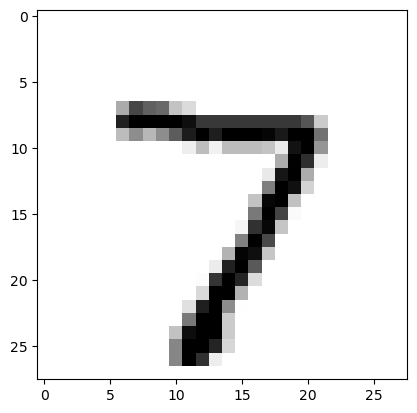

label:  7


In [6]:
# inspect the first image using the matplotlib
import matplotlib.pyplot as plt
xmpl_image = test_images[0]
xmpl_label = test_labels[0]
print('samples:')
plt.imshow(xmpl_image, cmap=plt.cm.binary)
plt.show()

# check the label is correct
print('label: ', xmpl_label)

In [7]:
# reshape flattens 28 x 28 array to a vector of 784 elements
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

#cast as floats and rescale from to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#### The network is also expecting categorically encoded labels
a vector with a single nonzero element corresponding to the category

Each label will be turned in to a 10 element vector with a single 'hot' nonzero entry

for example 7 is encoded as (0,0,0,0,0,0,0,1,0,0)

One - hot encoding

In [8]:
# encode with the convenient to_categorical function
from tensorflow.keras.utils import to_categorical

orig_label = test_labels[0]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#check encoding
print('\'', orig_label, '\'', ' as one-hot vector:\t', test_labels[0], sep='')

'7' as one-hot vector:	[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 3. Build

In [9]:
#empty network
from keras.models import Sequential
network = Sequential()

In [10]:
#add two layers
from keras.layers import Dense, Input
# Add the first layer with Input shape
network.add(Input(shape=(28 * 28, )))

# Add the subsequent layers
network.add(Dense(512, activation='relu'))
network.add(Dense(10, activation='softmax'))

The second softmax layer outputs a vector whose elements form a probability distribution

    - the numbers are nonnegative and sum to one - a probability distribution
    - outputs are interpreted as probabilities of membership of each class: the probability that the input sample is labeled '0' or '1' or '2' and so on


However the network is not yet ready. We must specify a loss function, an optimiser and one or more training metrics

The loss function quantifies how far off the network prediction is from the target

The optimiser makes parameter adjustments in the training loop and metrics report on progress

In [12]:
network.compile(optimizer ='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
#rmsprop is one of several tensorflow.keras optimizer
#Categorical crossentropy is the preferred loss for single label multiclass problems
#accuracy is the fraction of correctly classified samples

### 4. Train

We have to decide:

    - the number of samples processed in a single pass of the training algorithm - the mini-batch size
    - the number of complete passes through the entire training set - the number of epochs

In [13]:
# training - fit to input data
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 0.4403
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1154
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9786 - loss: 0.0710
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0547
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0381


### 5. Test

In [14]:
# evaluate on the test set
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.9749 - loss: 0.0766


In [15]:
# network prediction for a single sample
# ten numbers, each a probability of class membership
network.predict(test_images[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[9.2000514e-09, 2.9361751e-09, 3.8711210e-06, 2.5862901e-05,
        3.9980144e-11, 1.0089801e-07, 5.6675536e-13, 9.9996960e-01,
        9.5197286e-08, 5.2229348e-07]], dtype=float32)

In [29]:
# what is the most probable class?
# the index of the largest element of the output vector
import numpy as np
np.argmax(network.predict(test_images[:1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


7

In [40]:
# does the prediction agree with the label?
raw_label_vector = test_labels[0]

predicated_label = np.argmax(raw_label_vector)
print(predicated_label)

7


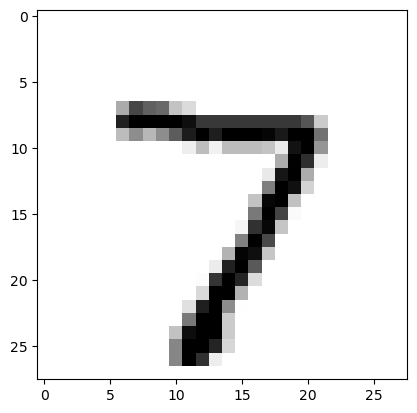

In [38]:
import matplotlib.pyplot as plt

# Reshape the first test image back to its original shape
image_to_show = test_images[0].reshape((28, 28))

# Display the image
plt.imshow(image_to_show, cmap=plt.cm.binary)
plt.show()

Remember that the network does not have eyes and a visual cortex. The network only mapped 784 element vector to a 10 component probability factor.